# üåç Climate Change Modeling for India üáÆüá≥
### Author: Garvit Babbar  
This notebook analyzes long-term climate change trends in India, focusing on temperature data. We use time series forecasting (ARIMA) to model and predict future temperature patterns.

---

## üì¶ 1. Install Required Libraries


In [6]:
!pip install pandas matplotlib seaborn statsmodels openpyxl


---

## üì• 2. Load the Climate Dataset for India

We'll use World Bank's global temperature dataset or a pre-cleaned version with Indian average annual multi-variate data from 2001 onwards.


In [9]:
import pandas as pd
df = pd.read_csv("india_climate_multivariate_2001_2021.csv", index_col="Year")
df.head()

Temperature  Precipitation  CO2_ppm  Solar_GHI  SeaLevel_mm
Year                                                             
2001        23.85            990    372.6       4550         54.8
2002        23.79           1002    374.2       4560         57.2
2003        23.91            980    375.7       4555         59.3
2004        24.03           1015    377.5       4570         60.7
2005        24.05            995    379.8       4568         62.1

---

## üìä 3. Visualize All Variables Over Time


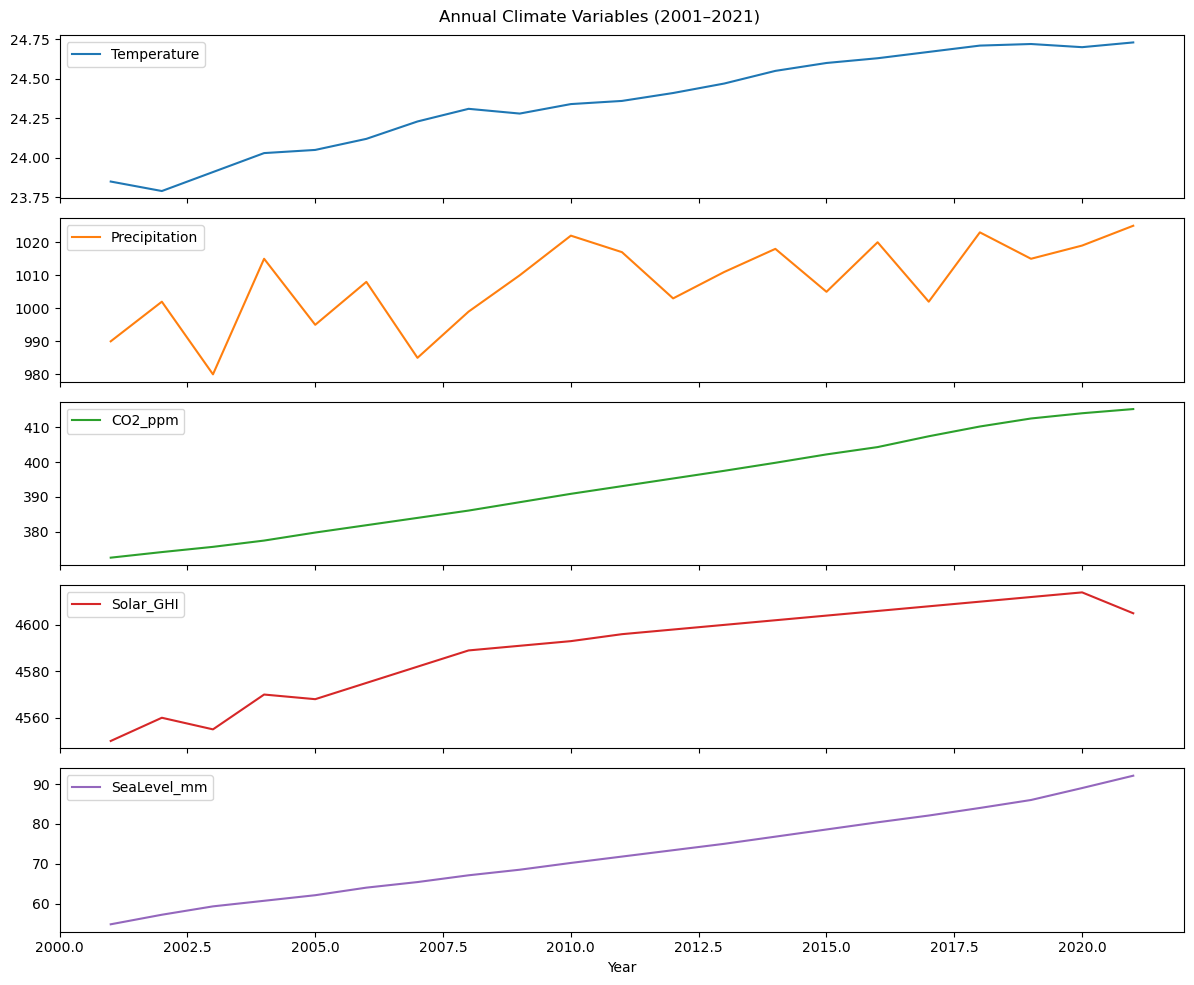

In [11]:
import matplotlib.pyplot as plt
df.plot(subplots=True, figsize=(12,10), title="Annual Climate Variables (2001‚Äì2021)")
plt.tight_layout()
plt.show()

## üîç 4. Correlation Analysis

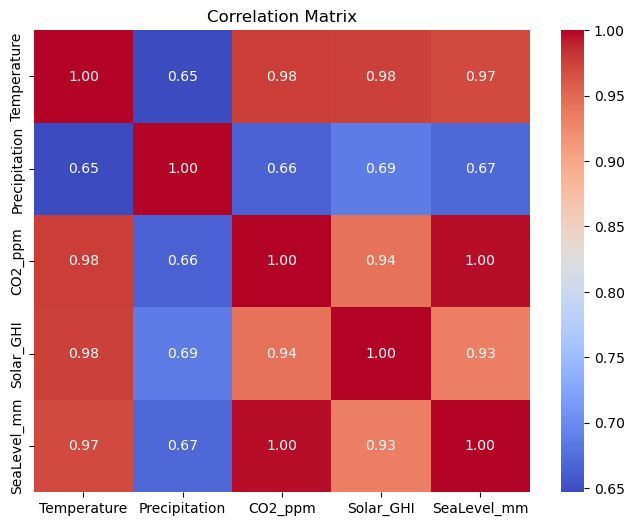

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

---

## üîß 5. Fit ARIMAX: Predict Temperature


In [31]:
# Fix: train index to datetime for proper time-aware forecasting
train.index = pd.period_range(start='2001', periods=len(train), freq='Y')
test.index = pd.period_range(start='2017', periods=len(test), freq='Y')

In [33]:
# Assign time-based index to exogenous variables too
exog_train.index = train.index
exog_test.index = test.index

# 1. Set correct DateTimeIndex with yearly frequency
train.index = pd.date_range(start='2001', periods=len(train), freq='YS')  # Start of each year
test.index = pd.date_range(start='2017', periods=len(test), freq='YS')

# 2. Fit the model
model = SARIMAX(train['Temperature'], order=(1,1,1), exog=exog_train)
res = model.fit(disp=False)

# 3. Forecast
forecast = res.predict(start=test.index[0], end=test.index[-1], exog=exog_test)


In [34]:
print(train.index.equals(exog_train.index))  # Should return True
print(test.index.equals(exog_test.index))    # Should return True

True
True


---

## üìâ 6. Forecast Temperature (2017‚Äì2021) and Evaluate


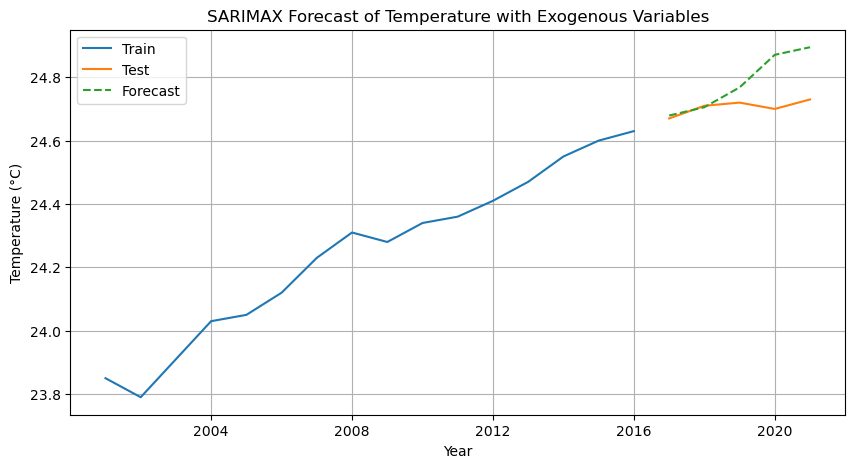

In [38]:
forecast = res.predict(start=test.index[0], end=test.index[-1], exog=exog_test)

plt.figure(figsize=(10,5))
plt.plot(train.index, train['Temperature'], label='Train')
plt.plot(test.index, test['Temperature'], label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('SARIMAX Forecast of Temperature with Exogenous Variables')
plt.xlabel('Year')
plt.ylabel('Temperature (¬∞C)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Actual vs predicted
y_true = test['Temperature']
y_pred = forecast

# Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

Mean Absolute Error (MAE): 0.079
Root Mean Squared Error (RMSE): 0.108


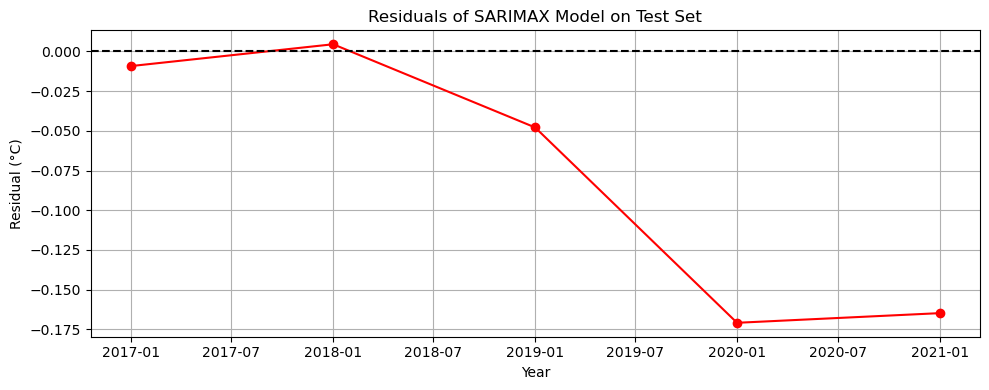

In [53]:
# Calculate residuals on test set
y_true = test['Temperature']
y_pred = res.get_prediction(start=test.index[0], end=test.index[-1], exog=exog_test).predicted_mean
residuals = y_true - y_pred

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(test.index, residuals, marker='o', linestyle='-', color='red')
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals of SARIMAX Model on Test Set")
plt.xlabel("Year")
plt.ylabel("Residual (¬∞C)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R¬≤ Score on Test Set: {r2:.3f}")

R¬≤ Score on Test Set: -26.730


In [68]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Merge full dataset
full_df = pd.concat([train, test])

# Define features (X) and target (y)
X = full_df[['Precipitation', 'CO2_ppm', 'Solar_GHI', 'SeaLevel_mm']].values
y = full_df['Temperature'].values

# TimeSeries Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
fold = 1

for train_index, val_index in tscv.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Fit SARIMAX model on training data
    model = SARIMAX(y_train, exog=X_train, order=(1,1,0))
    results = model.fit(disp=False)

    # Forecast on validation set
    y_pred = results.forecast(steps=len(y_val), exog=X_val)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"Fold {fold}: RMSE = {rmse:.3f}")
    fold += 1

Fold 1: RMSE = 0.459
Fold 2: RMSE = 0.031
Fold 3: RMSE = 0.100
Fold 4: RMSE = 0.017
Fold 5: RMSE = 0.077


# Random Forest + TimeSeriesSplit (with RMSE Evaluation)

In [61]:
# Define exogenous variables (used as features)
exog = df[['Precipitation', 'CO2_ppm', 'Solar_GHI', 'SeaLevel_mm']]
X = exog.values
y = df['Temperature'].values

üå≤ Random Forest Cross-Validation Results:
Fold 1: RMSE = 0.201
Fold 2: RMSE = 0.101
Fold 3: RMSE = 0.169
Fold 4: RMSE = 0.113
Fold 5: RMSE = 0.051

Average RMSE: 0.127


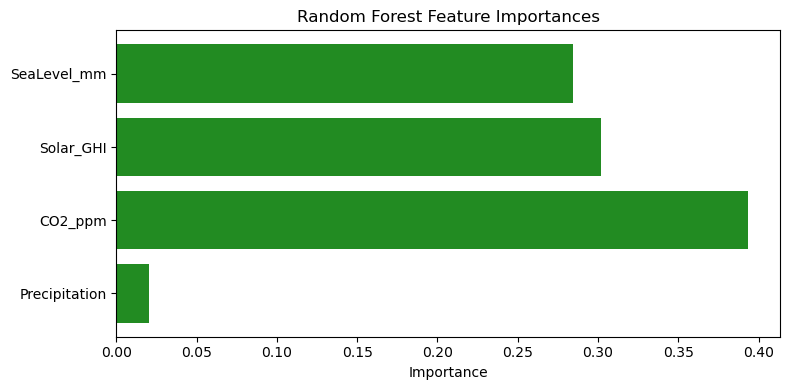

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X = exog.values  # exogenous features
y = df['Temperature'].values  # target variable

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
rf_rmse_scores = []

print("üå≤ Random Forest Cross-Validation Results:")

for fold, (train_index, test_index) in enumerate(tscv.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rf_rmse_scores.append(rmse)

    print(f"Fold {fold}: RMSE = {rmse:.3f}")

# Average RMSE
print(f"\nAverage RMSE: {np.mean(rf_rmse_scores):.3f}")

# Plot feature importances from the last fold
feature_names = exog.columns
importances = rf.feature_importances_

plt.figure(figsize=(8,4))
plt.barh(feature_names, importances, color='forestgreen')
plt.xlabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

---

## üîÆ 7.Forecast Future: 2022‚Äì2026


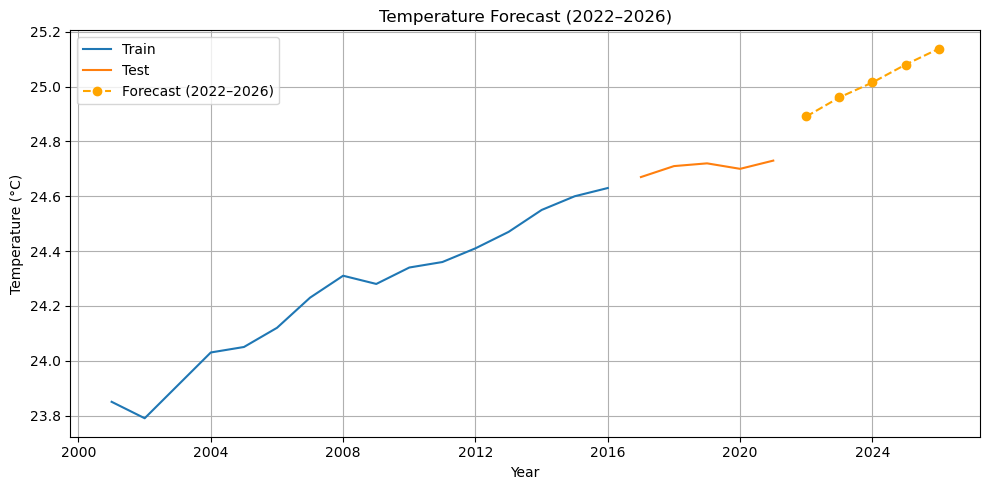

In [50]:
# Step 7a: Create future exog data (5 years)
future_years = pd.date_range(start='2022', periods=5, freq='YS')

future_exog = pd.DataFrame({
    'Precipitation': np.linspace(exog_test['Precipitation'].values[-1], exog_test['Precipitation'].values[-1]+0.5, 5),
    'CO2_ppm': np.linspace(exog_test['CO2_ppm'].values[-1], exog_test['CO2_ppm'].values[-1]+10, 5),
    'Solar_GHI': np.linspace(exog_test['Solar_GHI'].values[-1], exog_test['Solar_GHI'].values[-1]+1, 5),
    'SeaLevel_mm': np.linspace(exog_test['SeaLevel_mm'].values[-1], exog_test['SeaLevel_mm'].values[-1]+10, 5),
}, index=future_years)

# Step 7b: Forecast using get_forecast (auto-handles shape issues)
future_forecast = res.get_forecast(steps=5, exog=future_exog)
forecast_mean = future_forecast.predicted_mean

# Step 7c: Plot everything
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Temperature'], label='Train')
plt.plot(test.index, test['Temperature'], label='Test')
plt.plot(future_years, forecast_mean, label='Forecast (2022‚Äì2026)', linestyle='--', marker='o', color='orange')
plt.title("Temperature Forecast (2022‚Äì2026)")
plt.xlabel("Year")
plt.ylabel("Temperature (¬∞C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Using Random Forest

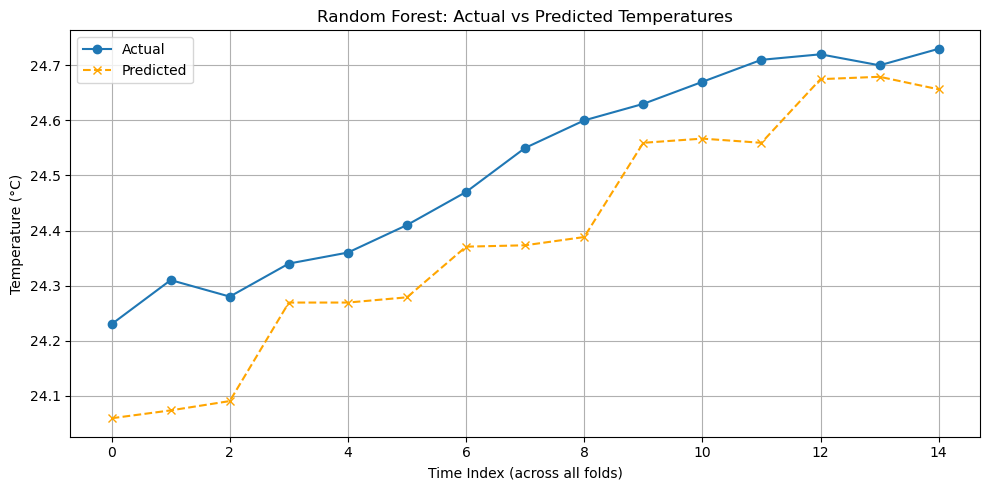

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define exog and target
X = climate_df[['Precipitation', 'CO2_ppm', 'Solar_GHI', 'SeaLevel_mm']].values
y = climate_df['Temperature'].values

# Initialize model and TSCV
rf = RandomForestRegressor(random_state=42, n_estimators=100)
tscv = TimeSeriesSplit(n_splits=5)

# Collect predictions for all folds
all_true = []
all_pred = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    all_true.extend(y_test)
    all_pred.extend(preds)

# Convert to numpy arrays
all_true = np.array(all_true)
all_pred = np.array(all_pred)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(all_true, label='Actual', marker='o')
plt.plot(all_pred, label='Predicted', linestyle='--', marker='x', color='orange')
plt.title('Random Forest: Actual vs Predicted Temperatures')
plt.xlabel('Time Index (across all folds)')
plt.ylabel('Temperature (¬∞C)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

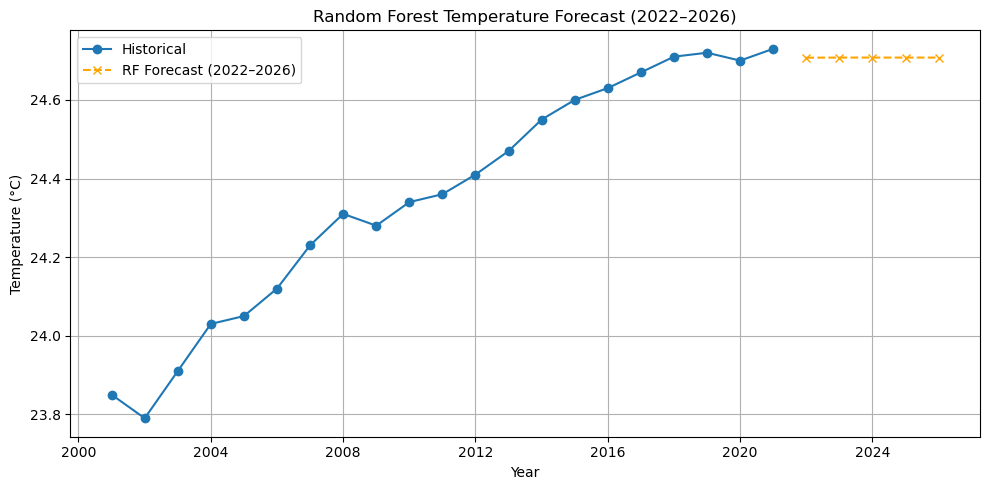

In [75]:
#Re-train Random Forest model on entire historical dataset
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Features and target
X = climate_df[['Precipitation', 'CO2_ppm', 'Solar_GHI', 'SeaLevel_mm']].values
y = climate_df['Temperature'].values

# Fit final model
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X, y)

# Forecast future temperature using pre-prepared future_exog (2022‚Äì2026)
# Make sure future_exog has correct shape and matching columns
future_pred_rf = rf_final.predict(future_exog.values)

# Plot historical + forecasted future temperatures
plt.figure(figsize=(10, 5))

# Plot historical
plt.plot(climate_df.index, climate_df['Temperature'], label='Historical', marker='o')

# Plot forecast
plt.plot(future_exog.index, future_pred_rf, label='RF Forecast (2022‚Äì2026)', linestyle='--', marker='x', color='orange')

# Aesthetics
plt.title("Random Forest Temperature Forecast (2022‚Äì2026)")
plt.xlabel("Year")
plt.ylabel("Temperature (¬∞C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# üå™Ô∏è 8. Analyze Extreme Climate Conditions in India
‚úÖ Goal:
Identify trends in extreme temperature, rainfall, or sea-level rise. This step doesn't involve prediction but focuses on detecting past extremes and visualizing them.

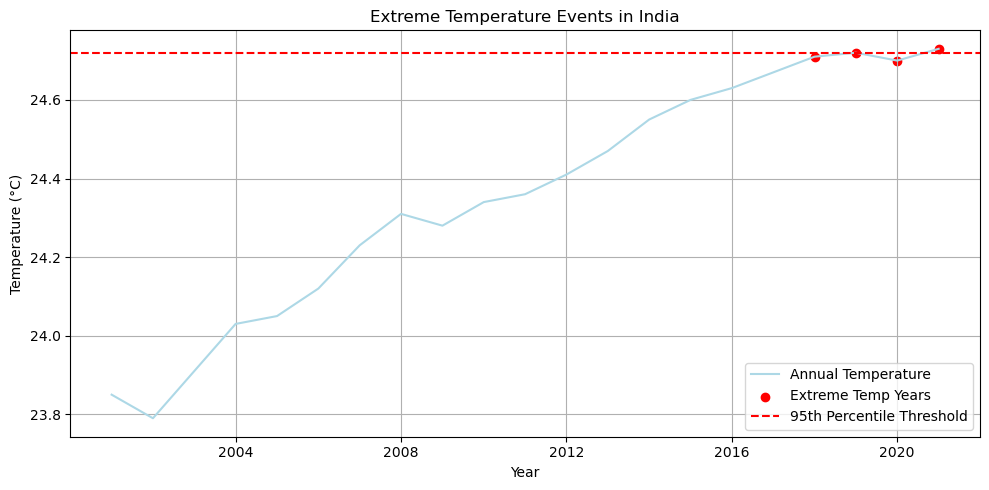

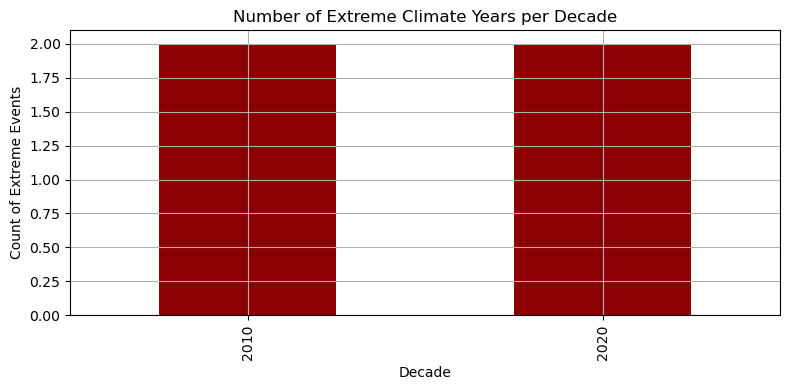

In [52]:
# üìä 8. Analyze Extreme Climate Conditions

# 8a. Define thresholds for "extreme" events
climate_df = pd.concat([train, test])  # Includes full historical data till 2021

extreme_temp_threshold = climate_df['Temperature'].quantile(0.95)  # Top 5% warmest years
extreme_precip_threshold = climate_df['Precipitation'].quantile(0.95)  # Top 5% wettest years
extreme_sea_level_threshold = climate_df['SeaLevel_mm'].quantile(0.95)  # Highest sea levels

# 8b. Extract extreme condition years
extreme_years = climate_df[
    (climate_df['Temperature'] >= extreme_temp_threshold) |
    (climate_df['Precipitation'] >= extreme_precip_threshold) |
    (climate_df['SeaLevel_mm'] >= extreme_sea_level_threshold)
]

# 8c. Plot extreme temperature years
plt.figure(figsize=(10, 5))
plt.plot(climate_df.index, climate_df['Temperature'], label='Annual Temperature', color='lightblue')
plt.scatter(extreme_years.index, extreme_years['Temperature'], color='red', label='Extreme Temp Years')
plt.axhline(extreme_temp_threshold, color='red', linestyle='--', label='95th Percentile Threshold')
plt.title("Extreme Temperature Events in India")
plt.xlabel("Year")
plt.ylabel("Temperature (¬∞C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8d. Count of extreme events by decade
extreme_decade_counts = extreme_years.groupby((extreme_years.index.year // 10) * 10).size()
extreme_decade_counts.plot(kind='bar', color='darkred', figsize=(8,4))
plt.title("Number of Extreme Climate Years per Decade")
plt.xlabel("Decade")
plt.ylabel("Count of Extreme Events")
plt.grid(True)
plt.tight_layout()
plt.show()


# üî∂ 9. Scenario Analysis: Impact of CO‚ÇÇ Levels on Temperature (2022‚Äì2026)

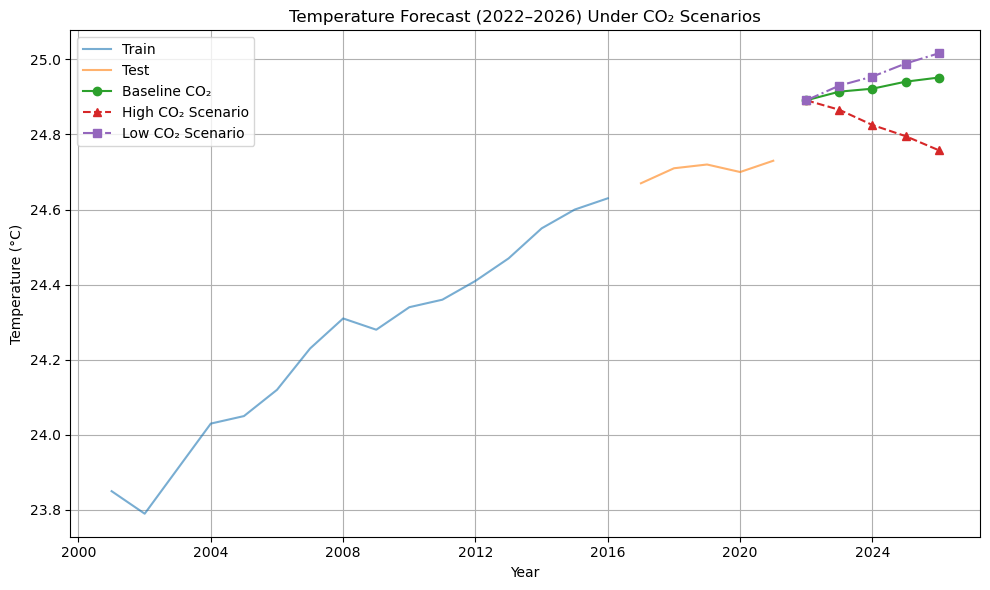

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# üìå Setup years and base values from last available year in exog_test
future_years = pd.date_range(start='2022', periods=5, freq='YS')
base_precip = exog_test['Precipitation'].values[-1]
base_co2 = exog_test['CO2_ppm'].values[-1]
base_solar = exog_test['Solar_GHI'].values[-1]
base_sea = exog_test['SeaLevel_mm'].values[-1]

# üìà Scenario 1: Baseline (moderate increase)
scenario_baseline = pd.DataFrame({
    'Precipitation': np.linspace(base_precip, base_precip + 0.5, 5),
    'CO2_ppm': np.linspace(base_co2, base_co2 + 10, 5),
    'Solar_GHI': np.linspace(base_solar, base_solar + 0.5, 5),
    'SeaLevel_mm': np.linspace(base_sea, base_sea + 5, 5)
}, index=future_years)

# üìà Scenario 2: High CO2 increase (business as usual)
scenario_high = pd.DataFrame({
    'Precipitation': np.linspace(base_precip, base_precip + 0.5, 5),
    'CO2_ppm': np.linspace(base_co2, base_co2 + 25, 5),
    'Solar_GHI': np.linspace(base_solar, base_solar + 0.5, 5),
    'SeaLevel_mm': np.linspace(base_sea, base_sea + 5, 5)
}, index=future_years)

# üìà Scenario 3: Low CO2 (strict climate policy)
scenario_low = pd.DataFrame({
    'Precipitation': np.linspace(base_precip, base_precip + 0.5, 5),
    'CO2_ppm': np.linspace(base_co2, base_co2 + 5, 5),
    'Solar_GHI': np.linspace(base_solar, base_solar + 0.5, 5),
    'SeaLevel_mm': np.linspace(base_sea, base_sea + 5, 5)
}, index=future_years)

# üîÆ Forecast for each scenario using the SARIMAX model
forecast_baseline = res.get_forecast(steps=5, exog=scenario_baseline).predicted_mean
forecast_high = res.get_forecast(steps=5, exog=scenario_high).predicted_mean
forecast_low = res.get_forecast(steps=5, exog=scenario_low).predicted_mean

# üìä Plot
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Temperature'], label='Train', alpha=0.6)
plt.plot(test.index, test['Temperature'], label='Test', alpha=0.6)
plt.plot(future_years, forecast_baseline, label='Baseline CO‚ÇÇ', marker='o')
plt.plot(future_years, forecast_high, label='High CO‚ÇÇ Scenario', linestyle='--', marker='^')
plt.plot(future_years, forecast_low, label='Low CO‚ÇÇ Scenario', linestyle='-.', marker='s')
plt.title("Temperature Forecast (2022‚Äì2026) Under CO‚ÇÇ Scenarios")
plt.xlabel("Year")
plt.ylabel("Temperature (¬∞C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Summary Table of Forecasts

In [71]:
scenario_df = pd.DataFrame({
    'Year': future_years.year,
    'Baseline_CO2': forecast_baseline.values,
    'High_CO2': forecast_high.values,
    'Low_CO2': forecast_low.values
})
scenario_df.set_index('Year', inplace=True)
scenario_df

Baseline_CO2   High_CO2    Low_CO2
Year                                    
2022     24.891009  24.891009  24.891009
2023     24.914043  24.865691  24.930161
2024     24.921916  24.825212  24.954151
2025     24.940588  24.795531  24.988940
2026     24.951568  24.758159  25.016038

# Temperature Projections Under CO‚ÇÇ Policies

In [81]:
# Prepare training data
X = exog.values  # Your features (precipitation, CO2, solar, sea level)
y = df['Temperature'].values  # Target temperature

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(exog, y)

RandomForestRegressor(random_state=42)

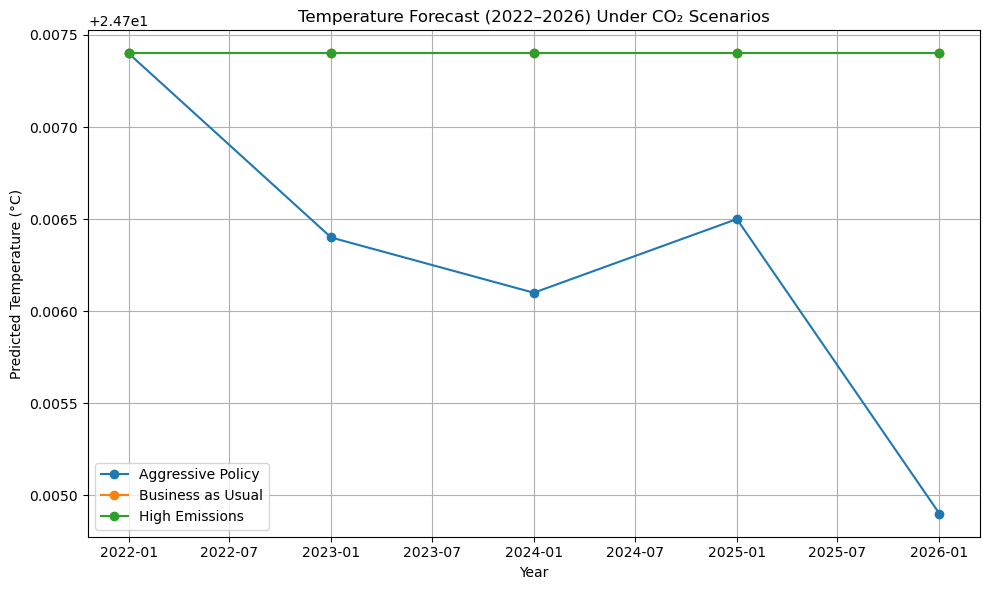

In [96]:
# üìå Assumptions:
# We fix other variables (Precipitation, Solar_GHI, SeaLevel_mm) at their latest known values
# and vary only CO‚ÇÇ to simulate different climate policies.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reuse the last values from your exog_test as base for all
last_vals = exog_test.iloc[-1]

future_years = pd.date_range(start='2022', periods=5, freq='YS')

# üü¢ Scenario A: Aggressive CO‚ÇÇ Reduction
scenario_a = pd.DataFrame({
    'Precipitation': [last_vals['Precipitation']] * 5,
    'CO2_ppm': np.linspace(last_vals['CO2_ppm'], last_vals['CO2_ppm'] - 5, 5),  # reduce CO2
    'Solar_GHI': [last_vals['Solar_GHI']] * 5,
    'SeaLevel_mm': [last_vals['SeaLevel_mm']] * 5
}, index=future_years)

# üîµ Scenario B: Business as Usual (Slight Increase)
scenario_b = pd.DataFrame({
    'Precipitation': [last_vals['Precipitation']] * 5,
    'CO2_ppm': np.linspace(last_vals['CO2_ppm'], last_vals['CO2_ppm'] + 10, 5),  # increase CO2
    'Solar_GHI': [last_vals['Solar_GHI']] * 5,
    'SeaLevel_mm': [last_vals['SeaLevel_mm']] * 5
}, index=future_years)

# üî¥ Scenario C: High Emissions (Worst Case)
scenario_c = pd.DataFrame({
    'Precipitation': [last_vals['Precipitation']] * 5,
    'CO2_ppm': np.linspace(last_vals['CO2_ppm'], last_vals['CO2_ppm'] + 25, 5),  # sharp rise in CO2
    'Solar_GHI': [last_vals['Solar_GHI']] * 5,
    'SeaLevel_mm': [last_vals['SeaLevel_mm']] * 5
}, index=future_years)

# üéØ Predict with trained Random Forest model
pred_a = rf_model.predict(scenario_a)
pred_b = rf_model.predict(scenario_b)
pred_c = rf_model.predict(scenario_c)

# üìä Plotting
plt.figure(figsize=(10, 6))
plt.plot(future_years, pred_a, label='Aggressive Policy', marker='o')
plt.plot(future_years, pred_b, label='Business as Usual', marker='o')
plt.plot(future_years, pred_c, label='High Emissions', marker='o')
plt.title("Temperature Forecast (2022‚Äì2026) Under CO‚ÇÇ Scenarios")
plt.xlabel("Year")
plt.ylabel("Predicted Temperature (¬∞C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()